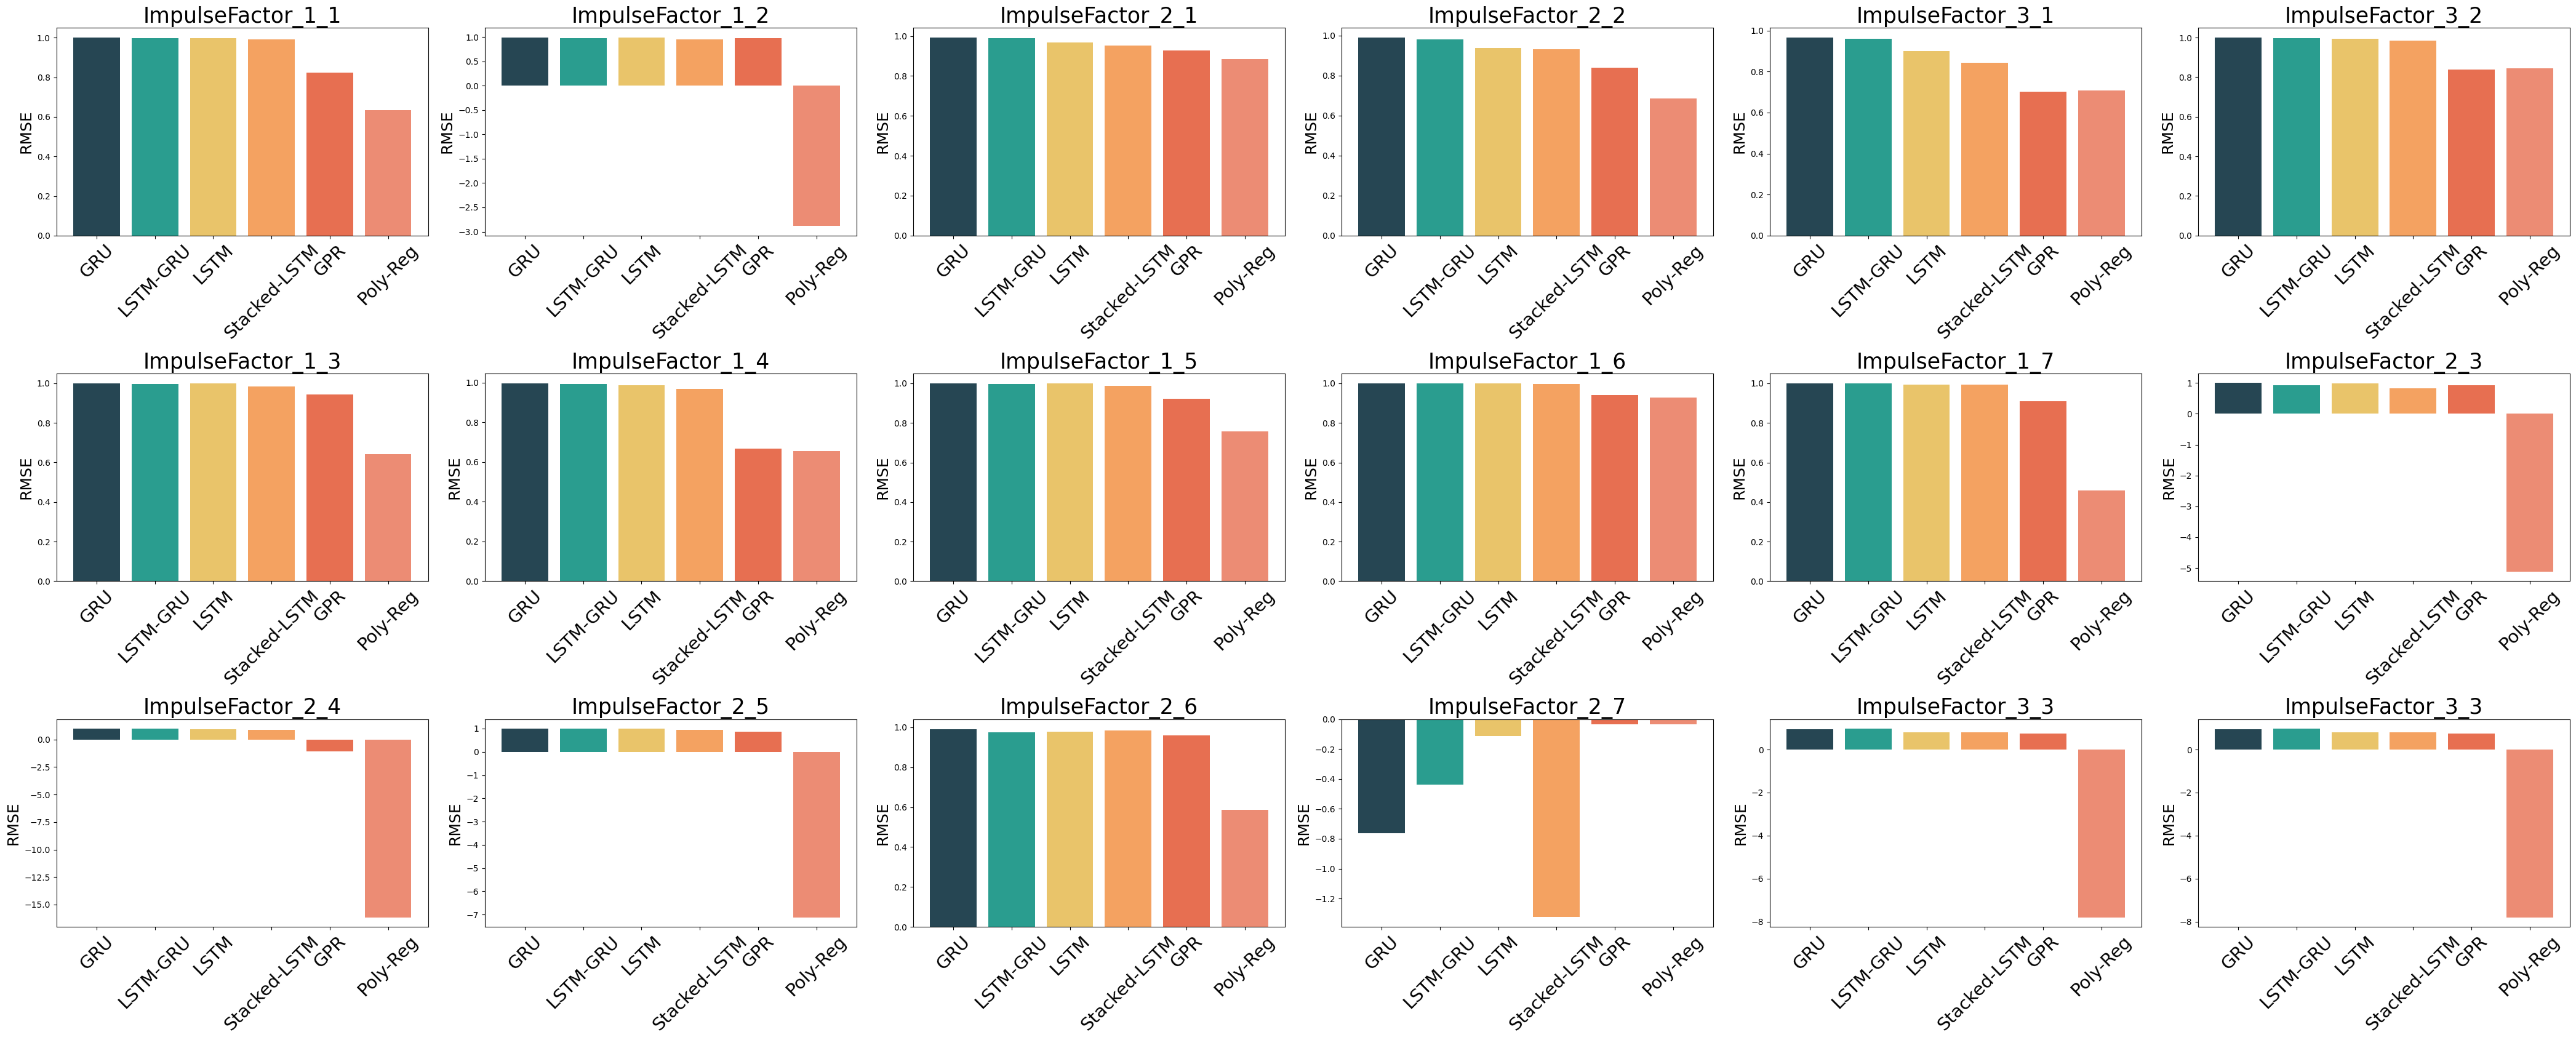

In [1]:
import json
import matplotlib.pyplot as plt

# Load JSON data for each model
Poly_Reg_Logistic_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Poly_Reg_Logistic.json") as json_file:
    Poly_Reg_Logistic_dat = json.load(json_file)

GPR_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GPR_Logistic.json") as json_file:
    GPR_dat = json.load(json_file)

LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM.json") as json_file:
    LSTM_dat = json.load(json_file)

Stacked_LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Stacked_LSTM.json") as json_file:
    Stacked_LSTM_dat = json.load(json_file)

GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GRU.json") as json_file:
    GRU_dat = json.load(json_file)

LSTM_GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM_GRU.json") as json_file:
    LSTM_GRU_dat = json.load(json_file)

# Function to get the max/min metric score across data splits
def getMetricScore(source: list, score: str, method: str = 'max'):
    """
    source: list containing performance data
    score: the metric to consider ('R2', 'MAE', etc.)
    method: 'max' to return maximum value, 'min' to return minimum value
    """

    def getMin(numbers):
        return min(numbers, key=abs)
    
    def getMax(numbers):
        return max(numbers, key=abs)
    
    dat = []
    for x in source:
        splits = list(x.values())[0]  # Retrieve the dictionary for each bearing
        values = [split[score] for split in splits]  # Get the values for different splits
        if method == 'max':
            dat.append(getMax(values))
        elif method == 'min':
            dat.append(getMin(values))
        elif method == 'avg':
            dat.append(np.mean(values))
    return dat

import numpy as np

# Prepare bearing IDs and configuration
bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
# bearing_ids = sorted(bearing_ids)
config = "R2"  # Metric to evaluate ('R2', 'MAE', etc.)
method = 'max'  # Select 'max' or 'min' to plot the best metric across splits

# Get R2 for 25% training split (max/min across splits)
r2_best_perc = {
    'GRU': getMetricScore(GRU_dat, config, method),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config, method),
    'LSTM': getMetricScore(LSTM_dat, config, method),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config, method),
    'GPR_Logistic': getMetricScore(GPR_dat, config, method),
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config, method),
}

# Plot the results
fig, axes = plt.subplots(3, 6, figsize=(42, 1 * len(bearing_ids)))

min_val, max_val = min(np.array([i for i in r2_best_perc.values()]).flatten()), max(np.array([i for i in r2_best_perc.values()]).flatten())

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, len(bearing_ids) - 1)
        # if(bearing_ids[index].split("_")[1] != "1"): continue

        # Sort models by performance metric (R²)
        keys = list(r2_best_perc.keys())
        values = [d[index] for d in r2_best_perc.values()]
        # zipped = zip(keys, values)
        # sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=(method == 'max'))
        # keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        custom_colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#ec8c74']
        ax.bar(keys, values, color=custom_colors)
        # ax.set_ylim(min_val, max_val)
        ax.set_xticks(range(len(keys)))
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45, size=21)
        ax.set_title(bearing_ids[index], size=25)
        ax.set_ylabel('RMSE', size=18)


plt.tight_layout()
plt.show()


In [2]:
r2_best_perc["GRU"]

[0.9997772660700224,
 0.9968639646376002,
 0.9914899311567453,
 0.9884456159596059,
 0.9645716283895619,
 0.9989523686245506,
 0.9988644694035431,
 0.9960900382917166,
 0.9995403691170611,
 0.9995420258315559,
 0.9995419738629406,
 0.9990323333798276,
 0.9637628080005384,
 0.999240874810951,
 0.9908237302335978,
 -0.7647575164065374,
 0.9304605368399954]

In [3]:
import pandas as pd
x = r2_best_perc
df = pd.DataFrame(x) #, index = [""]*len(x)) #.to_clipboard()
df["bearing"] = bearing_ids
# set index to bearing ID
df.set_index("bearing", inplace=True)
df.sort_values(by="bearing", inplace=True)
print(df)

                        GRU  LSTM-GRU      LSTM  Stacked-LSTM  GPR_Logistic  \
bearing                                                                       
ImpulseFactor_1_1  0.999777  0.998925  0.997611      0.992889      0.824398   
ImpulseFactor_1_2  0.996864  0.979931  0.992669      0.957977      0.975046   
ImpulseFactor_1_3  0.998864  0.994493  0.998305      0.982367      0.944399   
ImpulseFactor_1_4  0.996090  0.993394  0.986535      0.968676      0.667117   
ImpulseFactor_1_5  0.999540  0.997650  0.999108      0.987063      0.921620   
ImpulseFactor_1_6  0.999542  0.999552  0.998949      0.997471      0.939944   
ImpulseFactor_1_7  0.999542  0.999201  0.994112      0.993990      0.908934   
ImpulseFactor_2_1  0.991490  0.989335  0.968261      0.954110      0.928780   
ImpulseFactor_2_2  0.988446  0.981876  0.937218      0.929767      0.839444   
ImpulseFactor_2_3  0.999032  0.931033  0.987162      0.830610      0.923928   
ImpulseFactor_2_4  0.963763  0.990029  0.916841     

In [4]:
print(df.columns.values)

['GRU' 'LSTM-GRU' 'LSTM' 'Stacked-LSTM' 'GPR_Logistic' 'Poly-Reg_Logistic']


In [5]:
def compute_score(percent_error):
    if percent_error <= 0:  # Late predictions
        return np.exp(-np.log(0.5) * (percent_error / 5))
    else:  # Early predictions
        return np.exp(np.log(0.5) * (percent_error / 20))

In [8]:
for model in df.columns.values:
    idx = 0
    print(f"{model}:", end=" ")
    for i in df[model].values[idx:idx+7]:
        print(f"& {round(i, 4)}\%", end = " ")
    print(f"& {round(compute_score(np.mean(df[model].values[idx:idx+7])), 4)}", end= "")
    print()

GRU: & 0.9998\% & 0.9969\% & 0.9989\% & 0.9961\% & 0.9995\% & 0.9995\% & 0.9995\% & 0.966
LSTM-GRU: & 0.9989\% & 0.9799\% & 0.9945\% & 0.9934\% & 0.9976\% & 0.9996\% & 0.9992\% & 0.9661
LSTM: & 0.9976\% & 0.9927\% & 0.9983\% & 0.9865\% & 0.9991\% & 0.9989\% & 0.9941\% & 0.9661
Stacked-LSTM: & 0.9929\% & 0.958\% & 0.9824\% & 0.9687\% & 0.9871\% & 0.9975\% & 0.994\% & 0.9665
GPR_Logistic: & 0.8244\% & 0.975\% & 0.9444\% & 0.6671\% & 0.9216\% & 0.9399\% & 0.9089\% & 0.9699
Poly-Reg_Logistic: & 0.6346\% & -2.8856\% & 0.6427\% & 0.6552\% & 0.7575\% & 0.9282\% & 0.458\% & 0.9941


In [7]:
print(df.columns.values)

['GRU' 'LSTM-GRU' 'LSTM' 'Stacked-LSTM' 'GPR_Logistic' 'Poly-Reg_Logistic']


In [13]:
model = "GRU"
print(np.mean([x for x in df[model].values[0:7]]))
print(np.mean([x for x in df[model].values[7:13]]))
print(np.mean([x for x in df[model].values[14:]]))

0.9986028724592056
0.9887992155902109
0.9646615112847027


In [19]:
compute_score(np.mean([1.3, 0.10, 0.9]))

0.9737792517683345